# Convolutions with Fourier transforms 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import os
import sys
sys.path.append(os.path.join(os.getcwd(), '../build/'))
import pydeft as deft

Consider Poisson's equation in three dimensions,

$$
\nabla^2 \phi(\mathbf{r}) = f(\mathbf{r}) ,
$$

where $f(\mathbf{r})$ is a known function and we want to solve the equation for $\phi(\mathbf{r})$. 

Poisson's equation appears in various contexts, such as in

- Newtonian gravitation: $\nabla^2 \phi = 4\pi G \rho$, where $\phi$ is the gravitational potential and $\rho$ is the mass density;
- electrostatics:  $\nabla^2 \phi = -\frac{\rho}{\epsilon}$, where $\phi$ is the electrostatic potential and $\rho$ is the charge density;
- steady-state solute diffusion: $\nabla^2 C = -\frac{S}{D}$, where $C$ is the solute concentration, $S$ is represents solute sources and $D$ is diffusity;

Poisson's equation can be solved using a Green's function,

$$
\phi(\mathbf{r}) = - \iiint d^3\mathbf{r}'~\frac{f(\mathbf{r}')}{4\pi|\mathbf{r}-\mathbf{r}'|} = - (f * g)(\mathbf{r}) ~~\text{where} ~~ g(\mathbf{r}) = \frac{1}{4\pi |\mathbf{r}|}
$$

We use the notation $f*g$ to represent a convolution between functions $f$ and $g$. As solution for $\phi(\mathbf{r})$ takes the form of a convolution, we can calculate it efficiently using Fourier transforms because of the convolution theorem: real-space convolutions correspond to reciprocal-space products, 

$$
(f*g)(\mathbf{r}) = \mathcal{F}^{-1} \left\{ \tilde{f}(\mathbf{k})\tilde{g}(\mathbf{k}) \right\},
$$

where $\tilde{f}$ is a shorthand for the Fourier transform of $f$.

Noting the following Fourier transform relation, 

$$
\mathcal{F} \left\{ \frac{1}{r} \right\} = \frac{4\pi}{k^2},
$$

we can simplify the solution to Poisson's equation as 

$$
\phi(\mathbf{r}) = -\mathcal{F}^{-1} \left\{ \frac{\tilde{f}(\mathbf{k})}{k^2} \right\}
$$

To illustrate this, let us consider the source function

$$
f(x,y,z) = 3 - \cos(4\pi x) - \cos(4\pi y) - \cos(4\pi z)
$$

defined in a unit cube grid.

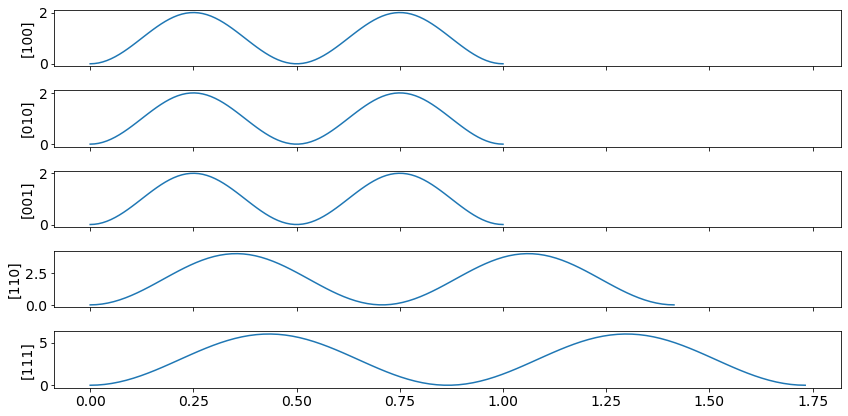

In [10]:
x = np.linspace(0, 1, 100)
X,Y,Z = np.meshgrid(x,x,x, indexing='ij')
r = np.sqrt(X*X + Y*Y + Z*Z)
f = 3 - np.cos(4*np.pi*X) - np.cos(4*np.pi*Y) - np.cos(4*np.pi*Z)

# Plotting
fig, ax = plt.subplots(5, 1, figsize = (12,6), sharex=True)
plt.rc('font', size=14)
ax[0].plot([r[i,0,0] for i in range(x.size)], [f[i,0,0] for i in range(x.size)])
ax[0].set_ylabel('[100]')
ax[1].plot([r[0,i,0] for i in range(x.size)], [f[0,i,0] for i in range(x.size)])
ax[1].set_ylabel('[010]')
ax[2].plot([r[0,0,i] for i in range(x.size)], [f[0,0,i] for i in range(x.size)])
ax[2].set_ylabel('[001]')
ax[3].plot([r[i,i,0] for i in range(x.size)], [f[i,i,0] for i in range(x.size)])
ax[3].set_ylabel('[110]')
ax[4].plot([r[i,i,i] for i in range(x.size)], [f[i,i,i] for i in range(x.size)])
ax[4].set_ylabel('[111]')
plt.tight_layout()
plt.show()

Let us takes the Fourier transform of $f(\mathbf{r})$ and calculate

$$
\phi(\mathbf{r}) = -\mathcal{F}^{-1} \left\{ \frac{\tilde{f}(\mathbf{k})}{k^2} \right\}
$$

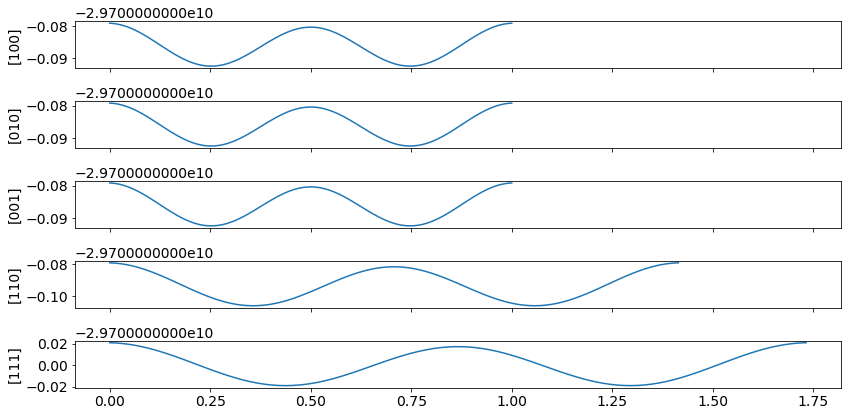

In [19]:
f_deft = deft.Double3D((x.size,x.size,x.size))
f_deft[...] = f
f_ft = deft.fourier_transform(f_deft) 

k = deft.wave_numbers(f_ft.shape(), deft.Box(np.eye(3)))[...]
# how to handle k=0?
k = np.where(k==0, 1e-5, k)
k_deft = deft.Complex3D(f_ft.shape())
k_deft[...] = k

phi = -deft.inverse_fourier_transform(f_ft/(k_deft*k_deft), f_deft.shape())

# Plotting
fig, ax = plt.subplots(5, 1, figsize = (12,6), sharex=True)
plt.rc('font', size=14)
ax[0].plot([r[i,0,0] for i in range(x.size)], [phi[i,0,0] for i in range(x.size)])
ax[0].set_ylabel('[100]')
ax[1].plot([r[0,i,0] for i in range(x.size)], [phi[0,i,0] for i in range(x.size)])
ax[1].set_ylabel('[010]')
ax[2].plot([r[0,0,i] for i in range(x.size)], [phi[0,0,i] for i in range(x.size)])
ax[2].set_ylabel('[001]')
ax[3].plot([r[i,i,0] for i in range(x.size)], [phi[i,i,0] for i in range(x.size)])
ax[3].set_ylabel('[110]')
ax[4].plot([r[i,i,i] for i in range(x.size)], [phi[i,i,i] for i in range(x.size)])
ax[4].set_ylabel('[111]')
plt.tight_layout()
plt.show()